# Principal Component Analysis (PCA)

Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality of data.
It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.
The PCA method can be described and implemented using the tools of linear algebra.

PCA is an operation applied to a dataset, represented by an n x m matrix A that results in a projection of A which we will call B. 
Let’s walk through the steps of this operation.

The first step is to calculate the mean values of each column

Next, we need to center the values in each column by subtracting the mean column value.

The next step is to calculate the covariance matrix of the centered matrix C.

Correlation is a normalized measure of the amount and direction (positive or negative) that two columns change together. Covariance is a generalized and unnormalized version of correlation across multiple columns. A covariance matrix is a calculation of covariance of a given matrix with covariance scores for every column with every other column, including itself.


Finally, we calculate the eigendecomposition of the covariance matrix V. This results in a list of eigenvalues and a list of eigenvectors.

The eigenvectors represent the directions or components for the reduced subspace of B, whereas the eigenvalues represent the magnitudes for the directions.

The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for A.

If all eigenvalues have a similar value, then we know that the existing representation may already be reasonably compressed or dense and that the projection may offer little. If there are eigenvalues close to zero, they represent components or axes of B that may be discarded.

A total of m or less components must be selected to comprise the chosen subspace. Ideally, we would select k eigenvectors, called principal components, that have the k largest eigenvalues.


Other matrix decomposition methods can be used such as Singular-Value Decomposition, or SVD. As such, generally the values are referred to as singular values and the vectors of the subspace are referred to as principal components.

Once chosen, data can be projected into the subspace via matrix multiplication.

Where A is the original data that we wish to project, B^T is the transpose of the chosen principal components and P is the projection of A.

This is called the covariance method for calculating the PCA, although there are alternative ways to to calculate it.


### Manually Calculate Principal Component Analysis

There is no pca() function in NumPy, but we can easily calculate the Principal Component Analysis step-by-step using NumPy functions.

The example below defines a small 3×2 matrix, centers the data in the matrix, calculates the covariance matrix of the centered data, and then the eigendecomposition of the covariance matrix. The eigenvectors and eigenvalues are taken as the principal components and singular values and used to project the original data.


In [287]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[7, 2], [8, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[7 2]
 [8 4]
 [5 6]]
[6.66666667 4.        ]
[[ 0.33333333 -2.        ]
 [ 1.33333333  0.        ]
 [-1.66666667  2.        ]]
[[ 2.33333333 -2.        ]
 [-2.          4.        ]]
[[-0.83205029  0.5547002 ]
 [-0.5547002  -0.83205029]]
[1.         5.33333333]
[[ 0.83205029  1.84900065]
 [-1.10940039  0.73960026]
 [ 0.2773501  -2.58860092]]


We can calculate a Principal Component Analysis on a dataset using the PCA() class in the scikit-learn library. The benefit of this approach is that once the projection is calculated, it can be applied to new data again and again quite easily.

When creating the class, the number of components can be specified as a parameter.

The class is first fit on a dataset by calling the fit() function, and then the original dataset or other data can be projected into a subspace with the chosen number of dimensions by calling the transform() function.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explained_variance_ and components_ attributes.

The example below demonstrates using this class by first creating an instance, fitting it on a 3×2 matrix, accessing the values and vectors of the projection, and transforming the original data.


In [288]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
A = array([[7, 2], [8, 4], [5, 6]])
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[7 2]
 [8 4]
 [5 6]]
[[-0.5547002   0.83205029]
 [ 0.83205029  0.5547002 ]]
[5.33333333 1.        ]
[[-1.84900065 -0.83205029]
 [-0.73960026  1.10940039]
 [ 2.58860092 -0.2773501 ]]


We can see, that with some very minor floating point rounding that we achieve the same principal components, singular values, and projection as in the previous example.

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 250 points:

In [289]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

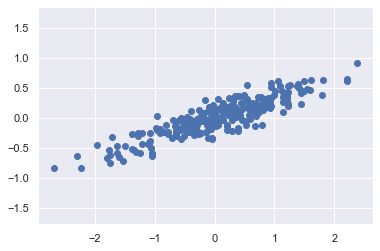

In [290]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 250)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [292]:
print(pca.components_)

[[-0.95065001 -0.3102653 ]
 [-0.3102653   0.95065001]]


In [293]:
print(pca.explained_variance_)


[0.84056217 0.01789296]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

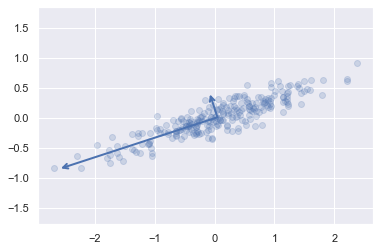

In [294]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle="->", color='b',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:


[(-3, 3),
 Text(0, 0.5, 'component 2'),
 (-5, 5),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

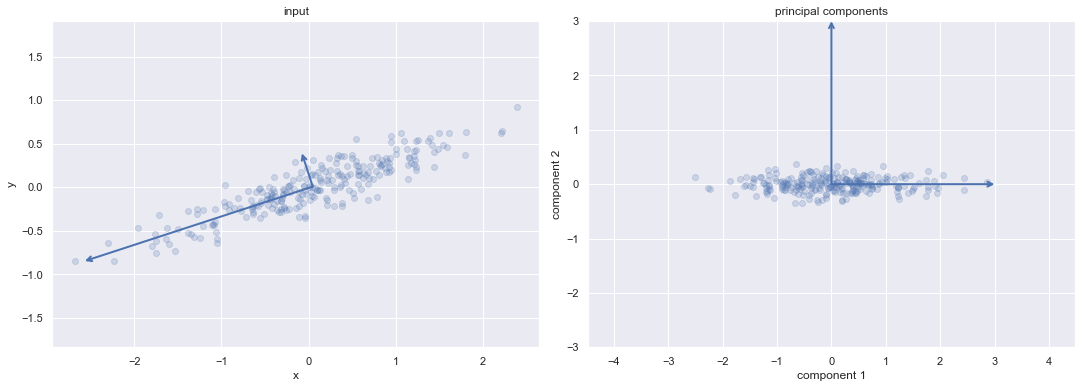

In [295]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3))

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.


#### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:


In [296]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


original shape:    (250, 2)
transformed shape: (250, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

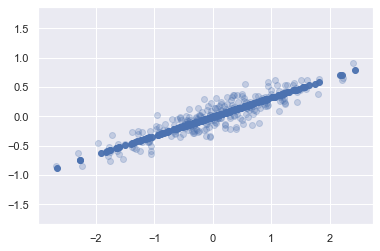

In [297]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.25)
plt.scatter(X_new[:, 0], X_new[:, 1] , color = 'b', alpha=0.95)
plt.axis('equal');


The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.


#### PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free digits data, the data consists of 8×8 pixel images, meaning that they are 64-dimensional:

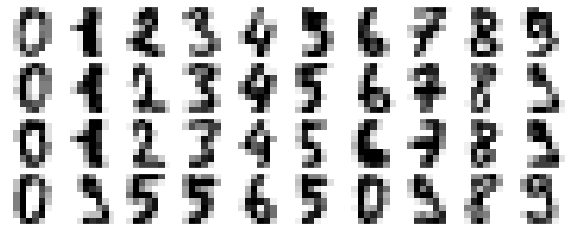

In [298]:
from sklearn.datasets import load_digits
digits = load_digits()
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

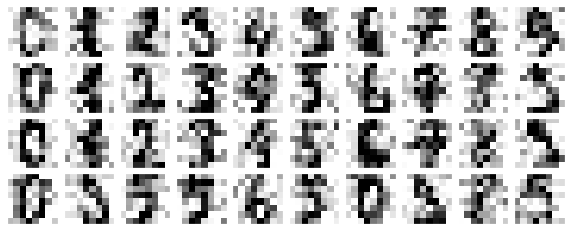

In [299]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [300]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

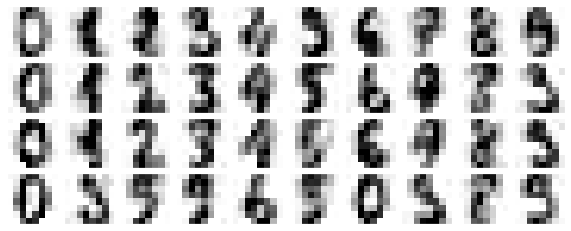

In [301]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, we might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

#### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

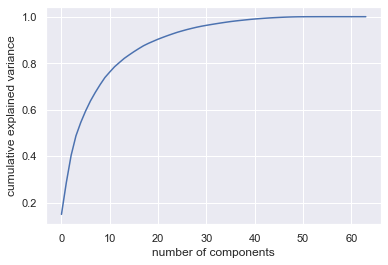

In [302]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while we need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations.

### Image Compression Using Principal Component Analysis (PCA)

Let's read a raw image as a numpy array, reduce it using PCA and render it back to its original dimension. Let's see how much of a difference there is in file size, quality etc. Let's import this image called "rocket" from skimage.data:

In [303]:
from skimage import data
img = data.rocket()

Let's look at the size of this numpy array object img as well as plot it using imshow.

(427, 640, 3)


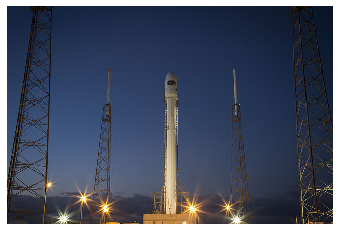

In [304]:
print (img.shape)
plt.axis('off') 
plt.imshow(img) 

So the array has 427 rows each of pixel 640x3. Let's reshape it into a format that PCA can understand. # 1920 = 640 * 3

In [305]:
img_r = np.reshape(img, (427, 1920)) 
print(img_r.shape)

(427, 1920)


Now let's plot cumulative explained variance vs number of components.

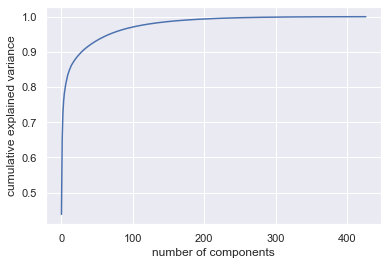

In [306]:
pca = PCA().fit(img_r)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can see the first 65 components contain approximately 95% of the variance, while we need around 200 components to describe close to 100% of the variance.

Now lets run PCA with 64 components (8x8 pixels) and transform the image.

In [309]:
No_of_components = 64
ipca = PCA(No_of_components).fit(img_r) 
img_c = ipca.transform(img_r) 
print (img_c.shape) 
print (np.sum(ipca.explained_variance_ratio_))

(427, 64)
0.9462537810417231


Looks like with 64 components we can explain about 94% of the variance.  

Now to visualize how PCA has performed this compression, let's inverse transform the PCA output and reshape for visualization using imshow.

In [311]:
temp = ipca.inverse_transform(img_c) 
print (temp.shape)
#reshaping 1920 back to the original 640 * 3 
temp = np.reshape(temp, (427,640,3)) 
print (temp.shape)

(427, 1920)
(427, 640, 3)


No No_of_componentsof components = 64
Variance = 0.9462537810417231


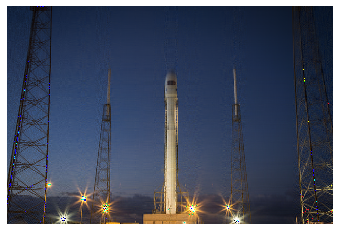

In [312]:
plt.axis('off')
plt.imshow(temp.astype('uint8'))
print ('No No_of_componentsof components =',No_of_components) 
print ('Variance =' ,np.sum(ipca.explained_variance_ratio_))

We can see that with 64 components we are able to get full sense of image as 94% variance is explained by these 64 principal components.

  
Now let's see how number of components are affecting the image quality:

No. of components = 427
Variance = 1.0


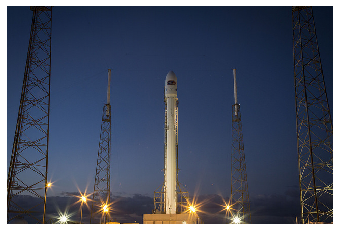

In [313]:
No_of_components = 427
ipca = PCA(No_of_components).fit(img_r) 
img_c = ipca.transform(img_r)  
temp = ipca.inverse_transform(img_c) 
temp = np.reshape(temp, (427,640,3))
plt.axis('off')
plt.imshow(temp.astype('uint8'))
print ('No. of components =',No_of_components) 
print ('Variance =' ,np.sum(ipca.explained_variance_ratio_))

No. of components = 150
Variance = 0.9860216018023059


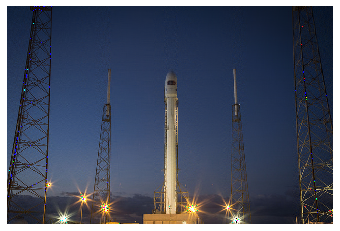

In [314]:
No_of_components = 150
ipca = PCA(No_of_components).fit(img_r) 
img_c = ipca.transform(img_r)  
temp = ipca.inverse_transform(img_c) 
temp = np.reshape(temp, (427,640,3))
plt.axis('off')
plt.imshow(temp.astype('uint8'))
print ('No. of components =',No_of_components) 
print ('Variance =' ,np.sum(ipca.explained_variance_ratio_))

No. of components = 5
Variance = 0.7812959568453792


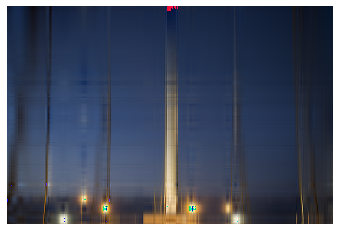

In [315]:
No_of_components = 5
ipca = PCA(No_of_components).fit(img_r) 
img_c = ipca.transform(img_r)  
temp = ipca.inverse_transform(img_c) 
temp = np.reshape(temp, (427,640,3))
plt.axis('off')
plt.imshow(temp.astype('uint8'))
print ('No. of components =',No_of_components) 
print ('Variance =' ,np.sum(ipca.explained_variance_ratio_))

No. of components = 1
Variance = 0.4383344081565966


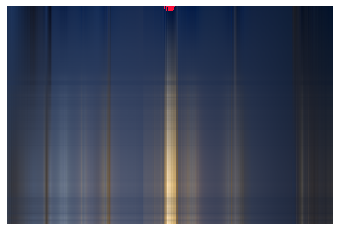

In [316]:
No_of_components = 1
ipca = PCA(No_of_components).fit(img_r) 
img_c = ipca.transform(img_r)  
temp = ipca.inverse_transform(img_c) 
temp = np.reshape(temp, (427,640,3))
plt.axis('off')
plt.imshow(temp.astype('uint8'))
print ('No. of components =',No_of_components) 
print ('Variance =' ,np.sum(ipca.explained_variance_ratio_))

We can see than even 1 principal component is able to explain about 44% of the variance

Advantages:  

1.Smaller database representation since only the trainee images are stored in the form of their projections on a reduced basis.  
2.Reduction of noise since the maximum variation basis is chosen and so the small variations in the back-ground are ignored automatically.  
3.Lack of redundancy of data given the orthogonal components.  
4.Reduced complexity in images’ grouping with the use of PCA.

Disadvantages:  
1.The covariance matrix is difficult to be evaluated in 
an accurate manner.  
2.Even the simplest invariance could not be captured by the PCA unless the training data explicitly provides this information.